# Task 1 - INM702 Coursework

## Content:
- **[Part 1](#part1)- Heuristic approach**
- [Part 1.1](#part1.1)- Visualisation of heuristic approach
- **[Part 2](#part2)- Djikstra algorithm implementation on heuristic approach**
- [Part 2.1](#part2.1)- Visualisation of implementation of Djikstra algorithm

[Back to top](#Content:)


<a id='part1'></a>
## Heuristic algorithm

In [2]:
#Build a method to build and visualize the grid filled with random numbers.
import random
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [3]:
HEIGHT = int(input("Insert amount of rows in the grid "))
WIDTH = int(input("Insert amount of columns in the grid "))

Insert amount of rows in the grid 30
Insert amount of columns in the grid 30


In [4]:
ARRAY = np.random.randint(0,9, (HEIGHT, WIDTH))
print(ARRAY)

[[1 4 0 7 5 3 4 7 3 8 0 5 5 1 2 2 3 3 6 5 1 5 5 2 7 5 0 8 0 3]
 [3 7 4 8 2 3 5 0 5 2 1 7 8 2 2 3 6 8 5 1 1 6 0 3 2 3 8 3 4 6]
 [6 8 6 8 1 2 2 5 7 6 3 4 5 1 5 0 8 0 0 8 6 7 3 5 6 6 4 5 4 3]
 [1 0 0 8 8 7 1 3 3 5 7 7 4 4 8 4 3 6 5 5 6 8 6 5 8 8 3 5 3 7]
 [4 3 7 0 5 4 3 3 0 1 8 5 5 3 6 1 4 7 1 8 4 7 3 3 1 6 3 5 2 6]
 [0 3 7 1 1 4 5 7 5 2 7 7 0 4 2 4 6 3 8 2 6 7 1 7 2 8 0 7 3 5]
 [7 3 1 8 8 7 7 4 0 6 8 4 8 8 7 4 3 7 0 8 6 0 0 4 4 7 2 2 1 6]
 [7 8 8 8 6 5 0 1 3 1 8 6 2 4 5 0 3 3 0 1 8 5 6 7 2 8 1 0 2 3]
 [8 4 5 0 4 2 8 3 4 0 3 3 1 1 2 2 3 1 5 4 0 0 8 0 0 4 5 8 1 7]
 [2 7 2 1 8 0 0 2 1 2 3 2 5 4 5 2 1 0 0 1 0 1 5 7 6 1 8 2 1 8]
 [8 3 5 6 0 4 4 5 7 6 8 7 6 1 3 6 3 0 1 1 5 7 4 7 3 8 4 8 5 7]
 [3 1 6 5 6 3 0 4 6 4 8 1 4 3 8 7 2 0 7 7 2 8 0 4 4 0 5 1 7 3]
 [4 6 4 7 0 5 0 4 5 2 6 5 1 4 5 6 5 5 1 4 3 8 3 2 8 4 6 1 4 2]
 [4 8 1 7 0 4 4 2 2 3 2 3 6 8 1 8 0 5 6 5 2 8 5 3 6 0 1 7 0 3]
 [4 4 4 6 4 6 1 2 8 4 2 0 5 4 2 8 5 1 1 8 8 7 4 8 6 6 4 2 0 6]
 [5 8 7 6 4 0 8 6 0 5 7 0 6 6 4 3 5 2 6 6 4 4 0 5 4 5 7

In [5]:
#finding neihbour in the grid for each cell
#agent moves from cell to cell (down and right in the heuristic approach)
def f_neighbours(array, i, j):
    neighbours_k = []
    neighbours_v = []
    while True:
        if i >= HEIGHT or j >= WIDTH:
            False
            
        #neighbors search goes cloclwise:
        elif i == 0 or i == (HEIGHT-1) or j == 0 or j == (WIDTH - 1):    # corners and sides
            
            if j != (WIDTH - 1):             
                neighbours_k.append(array[i, j+1])
                neighbours_v.append((i, j+1))#r
                
            if i != (HEIGHT-1):
                neighbours_k.append(array[i+1,j])
                neighbours_v.append((i+1, j))#d
                

        elif i < HEIGHT and j < WIDTH:
            neighbours_k = [array[i, j + 1], array[i + 1, j]]  
            neighbours_v = [(i,j + 1), (i + 1,j)]  
        return neighbours_k, neighbours_v


In [6]:
# finds the minimum weight of neighbours

def f_cell (ks):
    min_val=min(ks)
    return min_val

In [7]:
#finds key value index in the list "ks", so that that index position can be used to get the (i,j) location in the "vs" list
def f_location (ks, a):
    location = ks.index(a)
    return location

In [8]:
# find the row i position
def first(vs, idex_pos):
    location = vs[idex_pos]
#     print(location)
    i = location[0]
    return i

In [9]:
# find the column j position
def second (vs, idex_pos):
    location = vs[idex_pos]
    j = location[1]
    return j


In [10]:
# test game
game_is_on = True

score = []

next_cell = ARRAY[0, 0]
score.append(next_cell)
neighbours = {next_cell: (0, 0)}

prev_cell = ARRAY[0, 0]
prev_l = [(0, 0)]

i=0
j=0

In [11]:
while game_is_on:

    neighbours = f_neighbours(ARRAY, i, j) #finds all neighbours
    ks= neighbours[0] # list , which keeps record of the key value of the neighbour - its weight
    vs = neighbours[1] # list , which keeps record of the value (location) of the neighbour - (i,j)
   
    # if final destination is the neighbour, go straight to that cell (HEIGHT-1, WIDTH-1)
    if (HEIGHT-1, WIDTH-1) in vs:
        next_cell = ARRAY[HEIGHT-1, WIDTH-1]
        score.append(next_cell)
        index_pos = f_location(ks, next_cell)
        prev_l.append(vs[index_pos])
        game_is_on = False
    
    else:
        next_cell = f_cell(ks) #finding the minimum value cell
        index_pos = f_location(ks, next_cell)
    
        #if the smallest one  - the previous one, chose the other smallest
        if vs[index_pos] in prev_l:
            ks.remove(next_cell)
            del(vs[index_pos])
            next_cell = f_cell(ks)
            index_pos = f_location(ks, next_cell)


        score.append(next_cell)

        prev_cell=next_cell
        prev_l.append(vs[index_pos])

        i = first(vs, index_pos)
        j = second(vs, index_pos)

    
# print(score)
# len(score)

In [12]:
total = sum(score)  #sum of the list with weight of each step
print (f"End of the game. Your final score is {total}")

End of the game. Your final score is 178


[Back to top](#Content:)


<a id='part1.1'></a>
## Visualisation of heuristic approach

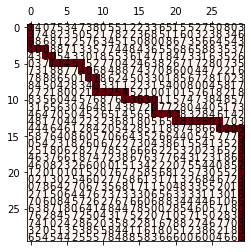

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

colored_path = np.zeros((HEIGHT,WIDTH), dtype=int)

for list in prev_l:
    r= list[0]
    c = list[1]
    colored_path[r,c] = 1
# print(colored_path)


min_val, max_val = 0, HEIGHT
for i in range(max_val):
    for j in range(max_val):
      c = ARRAY[j,i]
      ax.text(i, j, str(c), va='center', ha='center')

cax = ax.matshow(colored_path, cmap = plt.cm.Reds)
plt.show()

[Back to top](#Content:)


<a id='part2'></a>
## Djikstra algorithm implementation on heuristic approach
Implementation of heuristic approach for Gjikstra algorithm to find the shortest path

In [14]:
HEIGHT = int(input("Insert amount of rows in the grid "))
WIDTH = int(input("Insert amount of columns in the grid "))

Insert amount of rows in the grid 20
Insert amount of columns in the grid 20


In [15]:
ARRAY = np.random.randint(0,9, (HEIGHT, WIDTH))
print(ARRAY)

[[4 1 3 4 3 1 6 7 5 3 7 5 1 7 5 2 4 2 0 3]
 [0 1 1 6 0 7 2 1 7 6 2 5 2 6 0 8 2 0 5 3]
 [3 3 1 7 2 2 6 7 7 0 8 4 6 1 8 8 8 1 4 2]
 [0 2 7 7 6 2 3 5 4 5 5 0 0 4 2 6 4 4 8 0]
 [1 4 3 6 3 5 1 2 5 2 7 4 7 2 4 0 5 4 7 3]
 [4 6 1 0 6 1 0 6 4 8 7 5 4 1 1 8 4 2 8 4]
 [1 5 0 8 2 7 4 4 2 6 7 0 7 8 0 2 2 3 2 5]
 [8 4 5 0 6 1 4 1 2 3 8 7 4 8 1 5 0 1 4 8]
 [2 1 5 0 8 6 6 7 1 8 2 2 2 1 5 0 6 6 6 4]
 [5 6 2 6 5 0 8 6 6 3 4 7 7 8 2 3 0 1 2 7]
 [0 4 7 7 1 2 7 6 4 1 6 7 7 3 7 4 2 6 7 4]
 [6 0 0 3 4 5 1 8 6 0 2 0 7 1 0 7 4 4 7 0]
 [7 7 8 0 6 6 2 1 5 3 2 1 1 8 4 4 3 4 6 4]
 [0 4 7 0 4 0 1 3 4 1 2 1 4 0 7 7 1 5 8 1]
 [3 2 1 5 4 6 1 8 8 7 3 1 1 7 2 1 8 8 5 3]
 [0 7 0 2 3 0 4 8 2 8 1 7 3 8 2 0 1 5 2 5]
 [2 4 5 7 6 3 8 1 5 5 8 8 0 3 3 5 6 3 1 7]
 [3 5 5 7 5 1 7 4 4 1 7 1 6 0 5 3 0 1 4 7]
 [1 6 4 8 8 8 3 3 2 6 3 5 4 7 3 0 7 4 1 0]
 [2 4 4 6 5 4 1 0 6 5 7 7 2 3 0 2 3 1 3 2]]


In [16]:
#finding neihbour in the grid for each cell
#agent moves from cell to cell (up-u,down-d,left-l,right-r)
def f_neighbours(array, i, j):
    neighbours_k = []
    neighbours_v = []
    while True:
        if i >= HEIGHT or j >= WIDTH:
            False
            
        #neighbors search goes cloclwise:
        elif i == 0 or i == (HEIGHT-1) or j == 0 or j == (WIDTH - 1):    # corners and sides
            
            if i != 0:
                neighbours_k.append(array[i - 1, j])
                neighbours_v.append((i - 1,j)) # u
                
            if j != (WIDTH - 1):             
                neighbours_k.append(array[i, j+1])
                neighbours_v.append((i, j+1))#r
                
            if i != (HEIGHT-1):
                neighbours_k.append(array[i+1,j])
                neighbours_v.append((i+1, j))#d
                                    
            if j != 0:                  
                neighbours_k.append(array[i, j-1]) # l
                neighbours_v.append((i,j - 1)) 
                

        elif i < HEIGHT and j < WIDTH:
            neighbours_k = [array[i - 1, j], array[i, j + 1], array[i + 1, j], array[i, j - 1]]
            neighbours_v = [(i - 1,j), (i,j + 1), (i + 1,j), (i,j - 1)]
        return neighbours_k, neighbours_v


In [17]:
# finds the minimum weight 

def f_cell (ks):
    min_val=min(ks)
    return min_val

In [18]:
#finds key value index in the list "ks", so that that index position can be used to get the (i,j) location in the "vs" list
def f_location (ks, a):
    location = ks.index(a)
    return location

In [19]:
# find the row i position
def first(vs, idex_pos):
    location = vs[idex_pos]
#     print(location)
    i = location[0]
    return i

In [20]:
# find the column j position
def second (vs, idex_pos):
    location = vs[idex_pos]
    j = location[1]
    return j

In [21]:
# test game
game_is_on = True

score = []

next_cell = ARRAY[0, 0]
score.append(next_cell)
neighbours = {next_cell: (0, 0)}

prev_cell = ARRAY[0, 0]
prev_l = [(0, 0)]

i=0
j=0

In [22]:
while game_is_on:

    neighbours = f_neighbours(ARRAY, i, j) #finds all neighbours
    ks= neighbours[0] #key values - the "weight"
    vs = neighbours[1] # values - the location(i,j)
   
#     print(ks)
#     print(vs)
    #if next_cell is our destination cell then the program stops
    if (HEIGHT-1, WIDTH-1) in vs:
        next_cell = ARRAY[HEIGHT-1, WIDTH-1]
        score.append(next_cell)
        index_pos = f_location(ks, next_cell)
        prev_l.append(vs[index_pos])
        game_is_on = False
        
    else:
        next_cell = f_cell(ks) #finding the minimum value cell
        index_pos = f_location(ks, next_cell)
        
        

     #if the smallest one  - the previous one, chose the other smallest
#         for _ in itertools.repeat(None, (len(neighbours))):
#         for _ in range (len(neighbours)): # number of neighbours need to be tested for the "visited" status
   
        if vs[index_pos] in prev_l:
            ks.remove(next_cell)
            del(vs[index_pos])
            next_cell = f_cell(ks)
            index_pos = f_location(ks, next_cell)


#         if vs[index_pos] in prev_l:
#             ks.remove(next_cell)
#             del(vs[index_pos])
#             next_cell = f_cell(ks)
#             index_pos = f_location(ks, next_cell)


#         if vs[index_pos] in prev_l:
#             ks.remove(next_cell)
#             del(vs[index_pos])
#             next_cell = f_cell(ks)
#             index_pos = f_location(ks, next_cell)


        #if the smallest one is on the side, eleminate that neigbour to 
#         if (vs[index_pos][0] == 0 and vs[index_pos][1] == j-1) or (vs[index_pos][0] == (WIDTH-1) and vs[index_pos][1] == j-1) or (vs[index_pos][0] == (i-1) and vs[index_pos][1] == HEIGHT-1) or (vs[index_pos][0] == (i-1) and vs[index_pos][1] == 0):
#         if ((vs[index_pos][0] >= 0 and vs[index_pos][0] <= (WIDTH-1)) and (vs[index_pos][1] == 0 or vs[index_pos][1] == (HEIGHT-1))):
#             ks.remove(next_cell)
#             del(vs[index_pos])
#             next_cell = f_cell(ks)
#             index_pos = f_location(ks, next_cell)
            
#         if ((vs[index_pos][1] >= 0 and vs[index_pos][1] <= (HEIGHT-1)) and ((vs[index_pos][0] == 0 or vs[index_pos][0] == (WIFTH-1)))):
#             ks.remove(next_cell)
#             del(vs[index_pos])
#             next_cell = f_cell(ks)
#             index_pos = f_location(ks, next_cell)
            
            
        #if the smallest one closer to the end, proceed further, not to backwards(left)
        if (vs[index_pos][0] >= (2/3*(WIDTH-1))) or (vs[index_pos][1] >= (2/3*(HEIGHT-1))):
            ks.remove(next_cell)
            del(vs[index_pos])
            next_cell = f_cell(ks)
            index_pos = f_location(ks, next_cell)

        score.append(next_cell)

        prev_cell=next_cell
        prev_l.append(vs[index_pos])

        i = first(vs, index_pos)
        j = second(vs, index_pos)
        print(score)


# print(score)
# len(score)

[4, 0]
[4, 0, 1]
[4, 0, 1, 1]
[4, 0, 1, 1, 3]
[4, 0, 1, 1, 3, 1]
[4, 0, 1, 1, 3, 1, 1]
[4, 0, 1, 1, 3, 1, 1, 3]
[4, 0, 1, 1, 3, 1, 1, 3, 1]
[4, 0, 1, 1, 3, 1, 1, 3, 1, 3]
[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1]
[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3]
[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1]
[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3]
[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1]
[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3]
[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1]
[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3]
[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1]
[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3]
[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1]
[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3]
[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1]
[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3]
[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1]
[4, 

[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 

[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 

[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 

[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 

[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,

[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 

[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 

[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 

[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
total_mode1 = sum(score)  #final path - is the sum of the list with weight of each step
print(score)
print (f"End of the game. Your final score for mode 1 is {total_mode1}")

[4, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 

In [ ]:
total_mode2 = 0  #final path - is the sum of the absolute difference of the previous and current cell 
for i in range(len(score)-1):
    n = abs((score[i+1])-score[i])
    score[i]=0
    total_mode2 += n
    score[i+1]=total_mode2
#     print(total_mode2)
#     print(score)
print (f"End of the game. Your final score for mode 2 is {total_mode2}")

[Back to top](#Content:)


<a id='part2.1'></a>
## Visualisation of implementation of Djikstra algorithm

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

colored_path = np.zeros((HEIGHT,WIDTH), dtype=int)

for list in prev_l:
    r= list[0]
    c = list[1]
    colored_path[r,c] = 1
# print(colored_path)


min_val, max_val = 0, HEIGHT
for i in range(max_val):
    for j in range(max_val):
      c = ARRAY[j,i]
      ax.text(i, j, str(c), va='center', ha='center')

cax = ax.matshow(colored_path, cmap = plt.cm.Reds)
plt.show()